In [1]:
import pandas as pd
from sklearn.datasets import load_breast_cancer

In [2]:
dt=load_breast_cancer()

In [3]:
df=pd.DataFrame(dt.data,columns=dt.feature_names)

In [4]:
df["target"]=dt.target

In [5]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [6]:
df.isna().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

In [7]:
x=df.drop("target",axis=1)
y=df["target"]

In [8]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
x_tr,x_ts,y_tr,y_ts=train_test_split(x,y,test_size=0.2,random_state=0)
algo=SVC(kernel="linear")

In [9]:
algo.fit(x_tr,y_tr)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [10]:
algo.score(x_ts,y_ts)

0.956140350877193

In [11]:
from sklearn.model_selection import cross_val_score

In [12]:
cross=cross_val_score(SVC(kernel="linear"),x_tr,y_tr,cv=5)

In [13]:
import numpy as np

In [14]:
np.average(cross)

0.9604395604395604

In [15]:
cross.mean()

0.9604395604395604

In [16]:
p=algo.predict(x_ts)

In [17]:
p

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1])

In [18]:
print(list(y_ts))

[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1]


In [19]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [20]:
confusion_matrix(y_ts,p)

array([[46,  1],
       [ 4, 63]], dtype=int64)

In [21]:
accuracy_score(y_ts,p)

0.956140350877193

## after feature scaling

In [22]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()



In [23]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
x_tr,x_ts,y_tr,y_ts=train_test_split(x,y,test_size=0.2,random_state=0)
x_tr_sc=std.fit_transform(x_tr)
x_ts_sc=std.transform(x_ts)

In [24]:
m=SVC(kernel="linear")

In [25]:
m.fit(x_tr_sc,y_tr)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [26]:
pre=m.predict(x_ts_sc)

In [27]:
from sklearn.metrics import accuracy_score
accuracy_score(y_ts,pre)

0.9824561403508771

In [28]:
pre

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1])

In [29]:
print(list(y_ts))

[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1]


In [30]:
cross=cross_val_score(SVC(kernel="linear"),x_tr_sc,y_tr,cv=5)
cross

array([0.95604396, 0.96703297, 0.94505495, 0.98901099, 0.98901099])

In [31]:
cross.mean()

0.9692307692307693

In [32]:
import seaborn as sns

In [33]:
from sklearn.metrics import confusion_matrix

In [34]:
a=confusion_matrix(y_ts,pre)
a

array([[46,  1],
       [ 1, 66]], dtype=int64)

In [35]:
from sklearn.linear_model import LogisticRegression
md=LogisticRegression()
md.fit(x_tr,y_tr)

c:\users\hp\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [36]:
md.score(x_ts,y_ts)

0.9473684210526315

In [39]:
import matplotlib.pyplot as plt

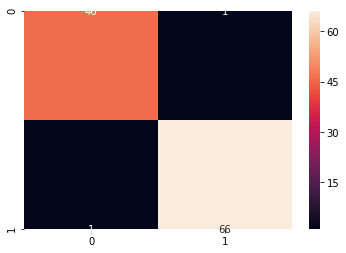

In [40]:
%matplotlib inline
sns.heatmap(a,annot=True)
plt.show()

## by using pipeline

In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
cls=Pipeline([("std",StandardScaler()),
             ("model",SVC(kernel="linear"))])

In [ ]:
cls.fit(x_tr_sc,y_tr)

In [ ]:
r=cls.predict(x_ts_sc)
r

In [ ]:
print(list(y_ts))

In [ ]:
accuracy_score(y_ts,r)

# c map name

YlGn
BuGn
PuBuGn
YlGnBu
PuBu
BuPu
YlOrRd
YlOrBr
Reds
Oranges
Blues
Greys
Purples

yl =yellow
pu= purple
bu=blue
gn=green
or=Orange
rd=red


In [ ]:
sns.heatmap(df.corr(),cmap="Reds")

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report

In [ ]:
classification_report(y_ts,pr)

In [ ]:
a=confusion_matrix(y_ts,pr)
a

In [ ]:
sns.heatmap(a,annot=True,linecolor="Blue")

# by using pca

In [ ]:
import pandas as pd
from sklearn.datasets import load_breast_cancer

In [ ]:
dt=load_breast_cancer()

In [ ]:
df=pd.DataFrame(dt.data,columns=dt.feature_names)
df["target"]=dt.target
df.head()

In [ ]:
x=

In [ ]:
a=StandardScaler()
x=a.fit_transform(df)
# x_ts=a.transform(x_ts)

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca=PCA(n_components=4)

In [ ]:
dt=pca.fit_transform(dt)
dt

In [ ]:
dt.shape

In [ ]:
x_ts=pca.transform(x_tr)

In [ ]:
from sklearn.svm import SVC

In [ ]:
model=SVC()

In [ ]:
model.fit(x_tr,y_tr)

In [ ]:
model.score(x_ts,y_ts)